In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read in data

In [2]:
df = pd.ExcelFile(r'../Data/raw_data/msb145697-sup-0002-tables2.xlsx')

In [3]:
expression_df_orig = df.parse('Sheet3', index_col='Gene')
metadata_df = df.parse('Sheet2')

In [4]:
expression_df_orig

,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397,GR.Clim.slope,GR.Clim.up_response_probability,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,...,GR.Alim.slope,GR.Alim.up_response_probability,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021,GR.Rlim.slope,GR.Rlim.up_response_probability,sector,correct_alignment_probability
Gene,,,,,,,,,,,,,,,,,,,,,
accA,0.84155,0.80308,0.84947,0.92120,1.03150,0.353770,1.597300e-01,1.14720,1.06180,1.16600,...,-0.29403,0.813020,1.08830,1.14360,1.14240,1.0,-0.146720,0.781880,O,6.590300e-01
accB,0.86095,0.80966,0.90902,0.87757,1.04900,0.308140,3.484400e-01,0.89856,0.89182,0.98957,...,0.13112,0.041855,0.94989,1.00850,0.96716,1.0,0.039572,0.119660,U,5.495900e-01
accC,0.91251,0.85893,0.90935,0.93960,1.02420,0.217020,2.248600e-01,0.85655,0.89878,0.89938,...,0.17606,0.327420,0.74842,0.72854,0.86662,1.0,0.392140,0.004441,U,5.190300e-01
accD,0.77291,0.85814,1.02810,0.95800,1.01680,0.363840,2.090100e-01,0.96642,1.20070,0.95447,...,0.08266,0.532650,1.09000,1.13880,1.08230,1.0,-0.157930,0.721770,R,2.668100e-01
aceA,9.69440,4.50290,2.88190,1.06860,0.97255,-13.470000,1.000000e+00,1.38870,1.39750,1.08090,...,-1.15250,0.996870,NaN,NaN,NaN,NaN,NaN,0.000000,S,9.968600e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuaY,3.00250,2.27880,2.09410,1.18340,0.92663,-3.552700,1.000000e+00,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,C,1.000000e+00
zapA,0.73201,0.95392,0.91208,0.65961,1.13620,0.353820,6.849800e-01,1.49140,0.50542,0.86449,...,0.64018,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,U,2.595100e-14
zapB,0.77221,0.76069,0.78271,0.87421,1.05030,0.478920,6.265800e-07,1.03620,1.03290,1.14370,...,-0.25751,0.868360,1.61840,1.51760,1.35770,1.0,-0.868650,0.999580,O,8.679900e-01


In [5]:
metadata_df

,Limitation,Growth Rate
0,C-lim,0.45205
1,C-lim,0.57762
2,C-lim,0.67079
3,C-lim,0.86643
4,C-lim,1.03970
5,A-lim,0.45702
6,A-lim,0.60274
7,A-lim,0.71705
8,A-lim,0.88487
9,A-lim,0.96718


In [6]:
#Rename columns in metadata
metadata_df.columns = ['Limitation', 'Growth_rate']

In [8]:
#Resort rows - Only needed when Clim columns ARE normalized
metadata_df = metadata_df.sort_values(by=['Limitation', 'Growth_rate'])

In [9]:
len(expression_df_orig)

1053

In [10]:
#expression_df_orig = expression_df_orig[expression_df_orig['correct_alignment_probability'] >= 0.5]

In [11]:
#len(expression_df_orig)

# Normalize Clim columns

In [12]:
#Create Clim dataframe
clim_df = expression_df_orig[['GR.Clim.0.45205', 'GR.Clim.0.57762', 'GR.Clim.0.67079', 'GR.Clim.0.86643', 'GR.Clim.1.0397']]
clim_df

,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397
Gene,,,,,
accA,0.84155,0.80308,0.84947,0.92120,1.03150
accB,0.86095,0.80966,0.90902,0.87757,1.04900
accC,0.91251,0.85893,0.90935,0.93960,1.02420
accD,0.77291,0.85814,1.02810,0.95800,1.01680
aceA,9.69440,4.50290,2.88190,1.06860,0.97255
...,...,...,...,...,...
yuaY,3.00250,2.27880,2.09410,1.18340,0.92663
zapA,0.73201,0.95392,0.91208,0.65961,1.13620
zapB,0.77221,0.76069,0.78271,0.87421,1.05030


In [13]:
#Divide by highest growth rate column to normalize
for i in range(len(clim_df)):
    for j in range(len(clim_df.iloc[0])):
        clim_df.iloc[i][j] = clim_df.iloc[i][j]/clim_df.iloc[i][4]
clim_df

,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397
Gene,,,,,
accA,0.815851,0.778556,0.823529,0.893068,1.0
accB,0.820734,0.771840,0.866559,0.836578,1.0
accC,0.890949,0.838635,0.887864,0.917399,1.0
accD,0.760140,0.843961,1.011113,0.942172,1.0
aceA,9.968022,4.629993,2.963241,1.098761,1.0
...,...,...,...,...,...
yuaY,3.240236,2.459234,2.259910,1.277101,1.0
zapA,0.644262,0.839570,0.802746,0.580540,1.0
zapB,0.735228,0.724260,0.745225,0.832343,1.0


In [14]:
#Update expression dataframe
cols_lst = expression_df_orig.columns.tolist()[5:]
expression_df = expression_df_orig[cols_lst].merge(clim_df, left_on=expression_df_orig.index, right_on=clim_df.index)
expression_df = expression_df.rename(columns={'key_0': 'Gene'}).set_index('Gene').sort_index(axis='columns')

In [15]:
expression_df

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Alim.slope,GR.Alim.up_response_probability,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,...,GR.Clim.slope,GR.Clim.up_response_probability,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021,GR.Rlim.slope,GR.Rlim.up_response_probability,correct_alignment_probability,sector
Gene,,,,,,,,,,,,,,,,,,,,,
accA,1.14720,1.06180,1.16600,0.98940,1.0,-0.29403,0.813020,0.815851,0.778556,0.823529,...,0.353770,1.597300e-01,1.08830,1.14360,1.14240,1.0,-0.146720,0.781880,6.590300e-01,O
accB,0.89856,0.89182,0.98957,0.88537,1.0,0.13112,0.041855,0.820734,0.771840,0.866559,...,0.308140,3.484400e-01,0.94989,1.00850,0.96716,1.0,0.039572,0.119660,5.495900e-01,U
accC,0.85655,0.89878,0.89938,0.86315,1.0,0.17606,0.327420,0.890949,0.838635,0.887864,...,0.217020,2.248600e-01,0.74842,0.72854,0.86662,1.0,0.392140,0.004441,5.190300e-01,U
accD,0.96642,1.20070,0.95447,1.18480,1.0,0.08266,0.532650,0.760140,0.843961,1.011113,...,0.363840,2.090100e-01,1.09000,1.13880,1.08230,1.0,-0.157930,0.721770,2.668100e-01,R
aceA,1.38870,1.39750,1.08090,0.72955,1.0,-1.15250,0.996870,9.968022,4.629993,2.963241,...,-13.470000,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,9.968600e-01,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuaY,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.240236,2.459234,2.259910,...,-3.552700,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+00,C
zapA,1.49140,0.50542,0.86449,2.12840,1.0,0.64018,1.000000,0.644262,0.839570,0.802746,...,0.353820,6.849800e-01,NaN,NaN,NaN,NaN,NaN,0.000000,2.595100e-14,U
zapB,1.03620,1.03290,1.14370,0.81774,1.0,-0.25751,0.868360,0.735228,0.724260,0.745225,...,0.478920,6.265800e-07,1.61840,1.51760,1.35770,1.0,-0.868650,0.999580,8.679900e-01,O


In [16]:
#Drop NaN in expression data
expression_df = expression_df.dropna(thresh=18)

In [17]:
expression_df

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Alim.slope,GR.Alim.up_response_probability,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,...,GR.Clim.slope,GR.Clim.up_response_probability,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021,GR.Rlim.slope,GR.Rlim.up_response_probability,correct_alignment_probability,sector
Gene,,,,,,,,,,,,,,,,,,,,,
accA,1.14720,1.06180,1.16600,0.98940,1.0,-0.29403,0.813020,0.815851,0.778556,0.823529,...,0.353770,1.597300e-01,1.08830,1.14360,1.14240,1.0,-0.146720,0.781880,0.659030,O
accB,0.89856,0.89182,0.98957,0.88537,1.0,0.13112,0.041855,0.820734,0.771840,0.866559,...,0.308140,3.484400e-01,0.94989,1.00850,0.96716,1.0,0.039572,0.119660,0.549590,U
accC,0.85655,0.89878,0.89938,0.86315,1.0,0.17606,0.327420,0.890949,0.838635,0.887864,...,0.217020,2.248600e-01,0.74842,0.72854,0.86662,1.0,0.392140,0.004441,0.519030,U
accD,0.96642,1.20070,0.95447,1.18480,1.0,0.08266,0.532650,0.760140,0.843961,1.011113,...,0.363840,2.090100e-01,1.09000,1.13880,1.08230,1.0,-0.157930,0.721770,0.266810,R
aceE,1.56530,1.44710,1.30310,0.98691,1.0,-1.23750,0.996400,0.696182,0.646990,0.692383,...,0.634950,1.617100e-03,1.00110,1.02010,1.04080,1.0,-0.004658,0.511790,0.509950,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yrbB,1.30160,1.18560,1.13320,0.96333,1.0,-0.64827,0.999980,0.853127,0.976653,0.891973,...,0.199780,1.596300e-03,1.29830,1.21570,1.11830,1.0,-0.409950,0.945850,0.945830,O
yrbC,1.77190,1.87450,1.62520,1.52740,1.0,-1.38340,0.999580,0.360843,0.597757,0.337638,...,0.918760,9.341700e-01,0.84916,0.91654,0.79167,1.0,0.161510,0.582500,0.027474,A
zapB,1.03620,1.03290,1.14370,0.81774,1.0,-0.25751,0.868360,0.735228,0.724260,0.745225,...,0.478920,6.265800e-07,1.61840,1.51760,1.35770,1.0,-0.868650,0.999580,0.867990,O


In [18]:
#Create dataframe of just the slopes in each condition
slopes_df = expression_df[['GR.Clim.slope', 'GR.Alim.slope', 'GR.Rlim.slope']]

In [19]:
slopes_df

,GR.Clim.slope,GR.Alim.slope,GR.Rlim.slope
Gene,,,
accA,0.353770,-0.29403,-0.146720
accB,0.308140,0.13112,0.039572
accC,0.217020,0.17606,0.392140
accD,0.363840,0.08266,-0.157930
aceE,0.634950,-1.23750,-0.004658
...,...,...,...
yrbB,0.199780,-0.64827,-0.409950
yrbC,0.918760,-1.38340,0.161510
zapB,0.478920,-0.25751,-0.868650


In [20]:
#Get genes that are positive and negative in all conditions
pos_lst = slopes_df[(slopes_df[slopes_df.columns] > 0).all(axis=1)].index.tolist()
neg_lst = slopes_df[(slopes_df[slopes_df.columns] < 0).all(axis=1)].index.tolist()

In [21]:
print(len(pos_lst))
print(len(neg_lst))

79
42


In [22]:
#Remove all columns besides those containing expression data for each gene
exp_df = expression_df.drop(columns=['GR.Clim.slope', 'GR.Clim.up_response_probability', 'GR.Alim.slope', 'GR.Alim.up_response_probability', 'GR.Rlim.slope', 'GR.Rlim.up_response_probability', 'sector', 'correct_alignment_probability'])

In [23]:
exp_df.head()

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021
Gene,,,,,,,,,,,,,,
accA,1.14720,1.06180,1.16600,0.98940,1.0,0.815851,0.778556,0.823529,0.893068,1.0,1.08830,1.14360,1.14240,1.0
accB,0.89856,0.89182,0.98957,0.88537,1.0,0.820734,0.771840,0.866559,0.836578,1.0,0.94989,1.00850,0.96716,1.0
accC,0.85655,0.89878,0.89938,0.86315,1.0,0.890949,0.838635,0.887864,0.917399,1.0,0.74842,0.72854,0.86662,1.0
accD,0.96642,1.20070,0.95447,1.18480,1.0,0.760140,0.843961,1.011113,0.942172,1.0,1.09000,1.13880,1.08230,1.0
aceE,1.56530,1.44710,1.30310,0.98691,1.0,0.696182,0.646990,0.692383,0.909293,1.0,1.00110,1.02010,1.04080,1.0


# Check distributions of variables

<AxesSubplot:ylabel='Frequency'>

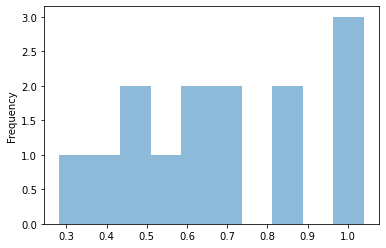

In [24]:
#Distribution of growth rate
metadata_df['Growth_rate'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

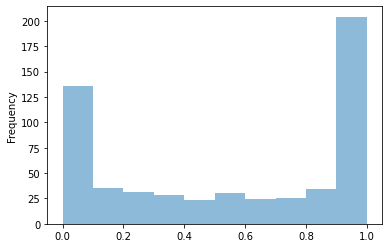

In [25]:
#Distribution of Alim up response probability - maybe remove the lower ones?
expression_df['GR.Alim.up_response_probability'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

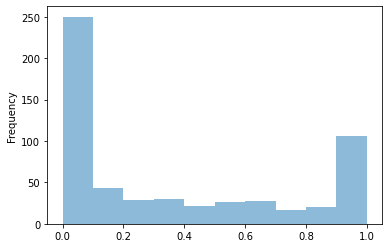

In [26]:
#Distribution of Clim up response probability - maybe remove the lower ones?
expression_df['GR.Clim.up_response_probability'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

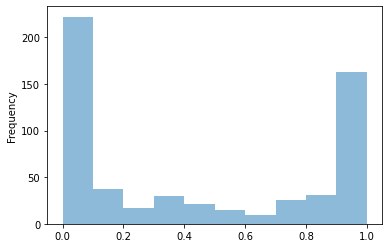

In [27]:
#Distribution of Rlim up response probability - maybe remove the lower ones?
expression_df['GR.Rlim.up_response_probability'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

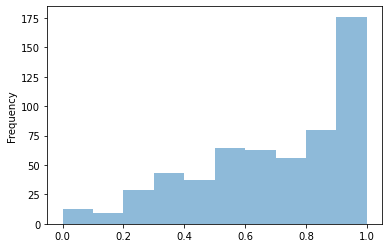

In [28]:
#Distribution of correct alignment probability - maybe remove the lower ones?
expression_df['correct_alignment_probability'].plot.hist(alpha=0.5)

# Summary statistics of gene expression

<AxesSubplot:ylabel='Frequency'>

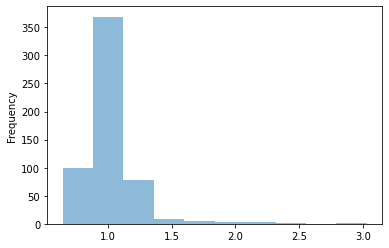

In [29]:
#Mean of expression data for each condition
exp_df.mean(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

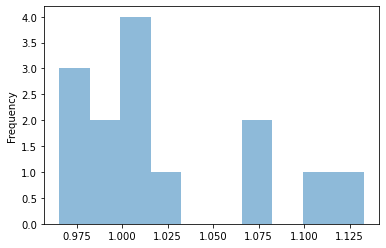

In [30]:
#Mean of expression data for each gene
exp_df.mean(axis='rows').plot.hist(alpha=0.5)

In [31]:
#Not worth continuing, weird artifact so drop row (when clim columns are NOT normalized)
exp_df[exp_df.mean(axis='columns') > 15]

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021
Gene,,,,,,,,,,,,,,


In [32]:
#Do this when Clim columns are NOT normalized
#exp_df = exp_df.drop(index='fadL')

In [33]:
print(len(expression_df))
print(len(exp_df))

570
570


# Get strongest correlations with growth

In [34]:
#Get gene with highest positive correlation to growth rate
curr_rho = 0.0
curr_gene = ''
for i in pos_lst:
    rho, p = stats.spearmanr(metadata_df['Growth_rate'], exp_df.loc[i].tolist())
    if rho > curr_rho:
        curr_gene = i
        curr_rho = rho
print(curr_gene)

purH


LinregressResult(slope=0.7148252237506487, intercept=0.292856811724271, rvalue=0.9590985896634553, pvalue=6.187980057677589e-08, stderr=0.06090364441070546)
SpearmanrResult(correlation=0.9646893137631861, pvalue=2.5932116399162077e-08)


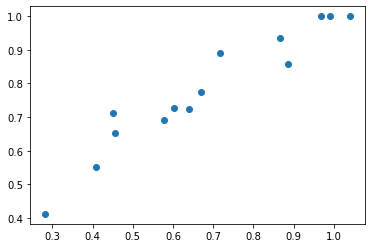

In [38]:
#Highest positive correlation
#When Clim IS NOT normalized
# fig, ax = plt.subplots()
# ax.scatter(metadata_df['Growth_rate'], exp_df.loc['glmS'].tolist())
# print(stats.linregress(metadata_df['Growth_rate'], exp_df.loc['glmS'].tolist()))
# print(stats.spearmanr(metadata_df['Growth_rate'], exp_df.loc['glmS'].tolist()))

#When Clim IS normalized
fig, ax = plt.subplots()
ax.scatter(metadata_df['Growth_rate'], exp_df.loc['purH'].tolist())
print(stats.linregress(metadata_df['Growth_rate'], exp_df.loc['purH'].tolist()))
print(stats.spearmanr(metadata_df['Growth_rate'], exp_df.loc['purH'].tolist()))

In [36]:
#Get gene with highest negative correlation to growth rate
curr_rho = 0.0
curr_gene = ''
for i in neg_lst:
    rho, p = stats.spearmanr(metadata_df['Growth_rate'], exp_df.loc[i].tolist())
    if rho < curr_rho:
        curr_gene = i
        curr_rho = rho
print(curr_gene)

fur


LinregressResult(slope=-0.8568673097124535, intercept=1.8191187893926772, rvalue=-0.8347707108814494, pvalue=0.0002037340377801224, stderr=0.16315115967788607)
SpearmanrResult(correlation=-0.9072936108848272, pvalue=7.486346045279326e-06)


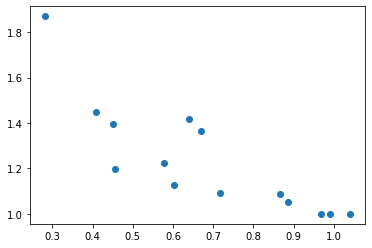

In [39]:
#Greatest negative correlation
fig, ax = plt.subplots()
ax.scatter(metadata_df['Growth_rate'], exp_df.loc['fur'].tolist())
print(stats.linregress(metadata_df['Growth_rate'], exp_df.loc['fur'].tolist()))
print(stats.spearmanr(metadata_df['Growth_rate'], exp_df.loc['fur'].tolist()))

In [40]:
slopes_df.iloc[0]

GR.Clim.slope    0.35377
GR.Alim.slope   -0.29403
GR.Rlim.slope   -0.14672
Name: accA, dtype: float64

# Cluster conditions together

In [41]:
#Spearman correlation of conditions
condition_corr_df = exp_df.corr(method='spearman')
condition_corr_df.head()

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021
GR.Alim.0.45702,1.000000,0.920166,0.881775,0.223103,NaN,0.212787,0.126326,0.087818,-0.110971,NaN,-0.213096,-0.177727,-0.185515,NaN
GR.Alim.0.60274,0.920166,1.000000,0.898892,0.267722,NaN,0.161300,0.073732,0.049044,-0.120687,NaN,-0.202516,-0.162407,-0.176056,NaN
GR.Alim.0.71705,0.881775,0.898892,1.000000,0.301900,NaN,0.161263,0.090204,0.074817,-0.110705,NaN,-0.203322,-0.167351,-0.161065,NaN
GR.Alim.0.88487,0.223103,0.267722,0.301900,1.000000,NaN,0.302793,0.268228,0.307946,0.214135,NaN,-0.082724,-0.102809,-0.112919,NaN
GR.Alim.0.96718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
sorted(condition_corr_df[condition_corr_df < 1.0].max(), reverse=True)

[0.9201657144687426,
 0.9201657144687426,
 nan,
 0.8989415598008857,
 0.8989415598008857,
 0.8988924147305876,
 0.8898354415759269,
 0.7510364895698237,
 nan,
 0.9343314055557675,
 0.9343314055557675,
 0.8741876459149784,
 0.30794623604274524,
 nan]

In [43]:
#Weak correlation between different (C vs A vs R) conditions
#When Clim columns are NOT normalized
# condition_corr_df[condition_corr_df == 0.3025961371922317]

#When Clim columns ARE normalized
condition_corr_df[condition_corr_df == 0.30794623604274524]

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021
GR.Alim.0.45702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Alim.0.60274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Alim.0.71705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Alim.0.88487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307946,NaN,NaN,NaN,NaN,NaN,NaN
GR.Alim.0.96718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Clim.0.45205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Clim.0.57762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Clim.0.67079,NaN,NaN,NaN,0.307946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Clim.0.86643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR.Clim.1.0397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### This needs work...

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
SpearmanrResult(correlation=nan, pvalue=nan)


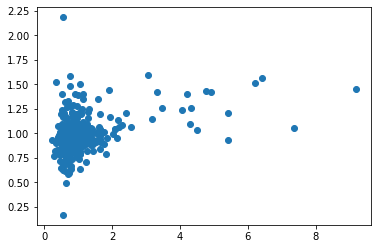

In [44]:
#Plot most correlated conditions to visualize - ugly
fig, ax = plt.subplots()
ax.scatter(exp_df['GR.Clim.0.67079'], exp_df['GR.Alim.0.88487'])
print(stats.linregress(exp_df['GR.Clim.0.67079'], exp_df['GR.Alim.0.88487']))
print(stats.spearmanr(exp_df['GR.Clim.0.67079'], exp_df['GR.Alim.0.88487']))

In [45]:
#Not normalized to 1 which is causing issues - when Clim columns are NOT normalized
exp_df[exp_df['GR.Clim.0.67079'] > 2].head()

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Alim.0.96718,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Clim.1.0397,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983,GR.Rlim.0.99021
Gene,,,,,,,,,,,,,,
acnB,1.037600,1.00430,1.05810,0.99464,1.0,2.460708,2.128917,2.017584,1.365710,1.0,0.813190,0.916080,1.00100,1.0
acs,0.741500,0.79454,0.90186,1.05030,1.0,13.099621,9.127908,7.369816,2.091998,1.0,0.457420,0.361660,0.34397,1.0
aldA,0.852930,0.86744,0.99179,1.20770,1.0,10.392492,6.981176,5.424363,2.246725,1.0,0.098521,0.261470,0.38102,1.0
cheA,0.097119,0.18868,0.39585,1.25830,1.0,4.149525,4.304947,4.320626,3.464613,1.0,NaN,0.104580,0.62664,1.0
cheW,0.187570,0.30844,0.63527,1.42490,1.0,4.608514,4.368253,4.918529,3.958591,1.0,NaN,0.083022,0.48636,1.0


### ...Until here

In [46]:
#Drop all NaN rows and columns
#When Clim columns are NOT normalized
# condition_corr_df = condition_corr_df.drop(columns=['GR.Alim.0.96718', 'GR.Rlim.0.99021'])

#When Clim columns ARE normalized
condition_corr_df = condition_corr_df.drop(columns=['GR.Alim.0.96718', 'GR.Rlim.0.99021', 'GR.Clim.1.0397'])


condition_corr_df = condition_corr_df.dropna()
condition_corr_df

,GR.Alim.0.45702,GR.Alim.0.60274,GR.Alim.0.71705,GR.Alim.0.88487,GR.Clim.0.45205,GR.Clim.0.57762,GR.Clim.0.67079,GR.Clim.0.86643,GR.Rlim.0.28292,GR.Rlim.0.40773,GR.Rlim.0.63983
GR.Alim.0.45702,1.000000,0.920166,0.881775,0.223103,0.212787,0.126326,0.087818,-0.110971,-0.213096,-0.177727,-0.185515
GR.Alim.0.60274,0.920166,1.000000,0.898892,0.267722,0.161300,0.073732,0.049044,-0.120687,-0.202516,-0.162407,-0.176056
GR.Alim.0.71705,0.881775,0.898892,1.000000,0.301900,0.161263,0.090204,0.074817,-0.110705,-0.203322,-0.167351,-0.161065
GR.Alim.0.88487,0.223103,0.267722,0.301900,1.000000,0.302793,0.268228,0.307946,0.214135,-0.082724,-0.102809,-0.112919
GR.Clim.0.45205,0.212787,0.161300,0.161263,0.302793,1.000000,0.889835,0.874006,0.640753,-0.092922,-0.116044,-0.102565
GR.Clim.0.57762,0.126326,0.073732,0.090204,0.268228,0.889835,1.000000,0.898942,0.680614,-0.093148,-0.118485,-0.084752
GR.Clim.0.67079,0.087818,0.049044,0.074817,0.307946,0.874006,0.898942,1.000000,0.751036,-0.058614,-0.070560,-0.034268
GR.Clim.0.86643,-0.110971,-0.120687,-0.110705,0.214135,0.640753,0.680614,0.751036,1.000000,-0.045440,-0.058453,-0.000429
GR.Rlim.0.28292,-0.213096,-0.202516,-0.203322,-0.082724,-0.092922,-0.093148,-0.058614,-0.045440,1.000000,0.934331,0.857048
GR.Rlim.0.40773,-0.177727,-0.162407,-0.167351,-0.102809,-0.116044,-0.118485,-0.070560,-0.058453,0.934331,1.000000,0.874188


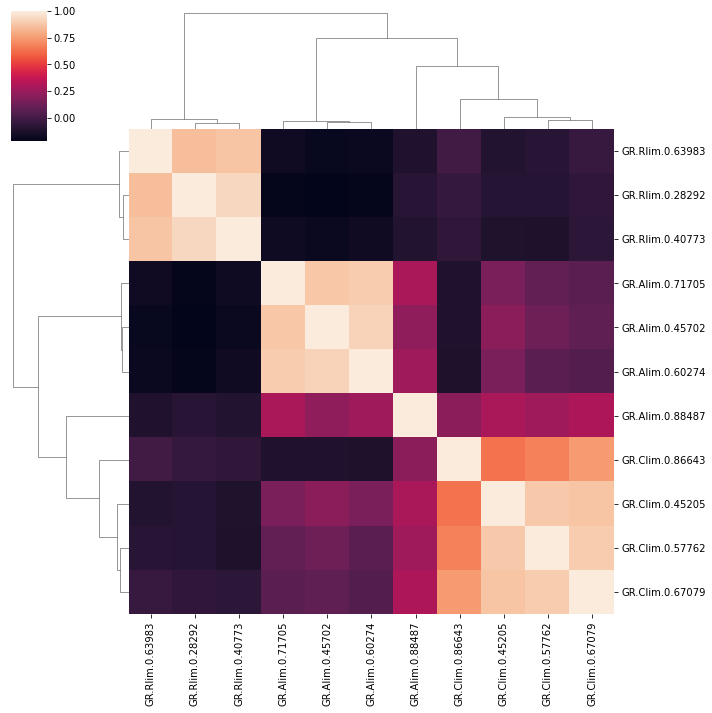

In [47]:
#Hierarchical clustering of condition correlations
sns.clustermap(condition_corr_df, yticklabels=True, xticklabels=True)

# Cluster genes together

In [48]:
#Spearman correlation of genes
genes_corr_df = exp_df.T.corr(method='spearman')
genes_corr_df.head()

Gene,accA,accB,accC,accD,aceE,aceF,ackA,acnA,acnB,acpP,...,yncE,yniC,yraL,yraM,yraP,yrbB,yrbC,zapB,zipA,zwf
Gene,,,,,,,,,,,,,,,,,,,,,
accA,1.000000,0.667406,-0.152993,0.348115,0.937916,0.600887,0.569845,-0.299335,-0.472284,0.738359,...,0.059867,-0.108647,0.370288,-0.197339,0.064302,0.875831,0.614191,0.915743,0.755556,0.791574
accB,0.667406,1.000000,0.228381,0.370288,0.547672,0.427938,0.121951,-0.680710,-0.711752,0.596452,...,-0.117517,0.011086,0.188470,-0.401330,-0.405765,0.547672,0.436807,0.676275,0.500000,0.640798
accC,-0.152993,0.228381,1.000000,-0.263858,-0.077605,0.454545,-0.769401,-0.015521,0.144124,-0.312639,...,0.525499,0.352550,0.170732,-0.623060,-0.374723,-0.317073,0.117517,-0.246120,-0.311111,0.312639
accD,0.348115,0.370288,-0.263858,1.000000,0.392461,0.184035,0.414634,-0.565410,-0.711752,0.445676,...,-0.325942,-0.578714,0.050998,-0.126386,-0.113082,0.356984,0.379157,0.476718,0.255556,0.232816
aceE,0.937916,0.547672,-0.077605,0.392461,1.000000,0.725055,0.560976,-0.148559,-0.392461,0.778271,...,0.188470,-0.037694,0.507761,-0.321508,0.175166,0.875831,0.729490,0.840355,0.772222,0.849224


/Users/sahil/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


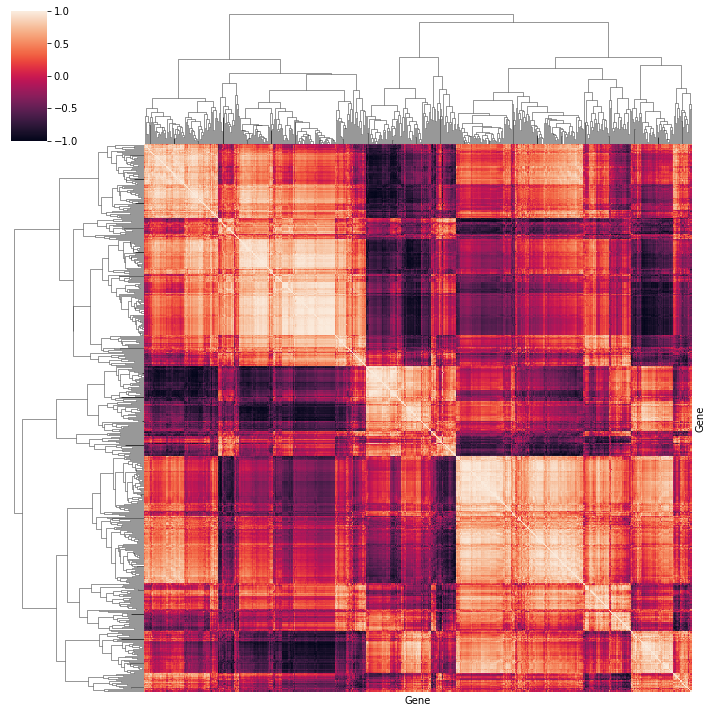

In [49]:
#Hierarchical clustering of condition correlations
sns.clustermap(genes_corr_df, yticklabels=False, xticklabels=False)
#We see what is shown in the paper with 5 distinct gene clusters - easier to see when Clim columns are NOT normalized

# Correlation between genes and growth rate

In [50]:
#Get summary stats for each gene
avg_expression_list = exp_df.mean(axis='columns').tolist()
med_expression_list = exp_df.median(axis='columns').tolist()
max_expression_list = exp_df.max(axis='columns').tolist()
min_expression_list = exp_df.min(axis='columns').tolist()

In [51]:
metadata_df

,Limitation,Growth_rate
5,A-lim,0.45702
6,A-lim,0.60274
7,A-lim,0.71705
8,A-lim,0.88487
9,A-lim,0.96718
0,C-lim,0.45205
1,C-lim,0.57762
2,C-lim,0.67079
3,C-lim,0.86643
4,C-lim,1.03970


In [52]:
rho_list = []
growth_rate_list = metadata_df['Growth_rate'].tolist()

for g in exp_df.values:
    rho, p = stats.spearmanr(g, growth_rate_list)
    rho_list.append(rho)

In [53]:
#Remove NaNs in rho list
nan_index_lst = np.argwhere(np.isnan(rho_list)).tolist()

for i in nan_index_lst[::-1]:
    del avg_expression_list[i[0]]
    del med_expression_list[i[0]]
    del max_expression_list[i[0]]
    del min_expression_list[i[0]]

rho_list = [rho for rho in rho_list if str(rho) != 'nan']

In [54]:
print(len(rho_list))
print(len(avg_expression_list))

513
513


LinregressResult(slope=-0.8756476964645865, intercept=0.9896022644388851, rvalue=-0.4467585003804225, pvalue=1.5488898051538107e-26, stderr=0.07757138243331363)
SpearmanrResult(correlation=-0.6634987282444313, pvalue=2.192569811915464e-66)


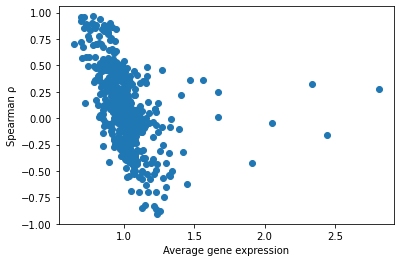

In [55]:
fig, ax = plt.subplots()
ax.scatter(avg_expression_list, rho_list)
plt.xlabel('Average gene expression')
plt.ylabel('Spearman ρ')
print(stats.linregress(avg_expression_list, rho_list))
print(stats.spearmanr(avg_expression_list, rho_list))

LinregressResult(slope=-2.563618322153424, intercept=2.5785565513248625, rvalue=-0.6967330842663315, pvalue=9.464782644353192e-76, stderr=0.1167604512127751)
SpearmanrResult(correlation=-0.7558164419362321, pvalue=4.947951593396182e-96)


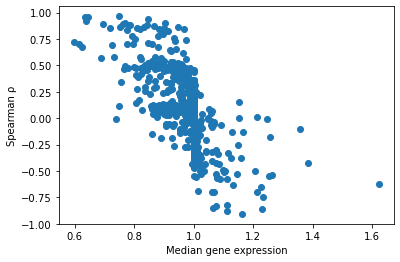

In [56]:
fig, ax = plt.subplots()
ax.scatter(med_expression_list, rho_list)
plt.xlabel('Median gene expression')
plt.ylabel('Spearman ρ')
print(stats.linregress(med_expression_list, rho_list))
print(stats.spearmanr(med_expression_list, rho_list))

LinregressResult(slope=-0.05784334479042919, intercept=0.2015089669423123, rvalue=-0.1466742159320768, pvalue=0.0008621442251349898, stderr=0.017257052903305935)
SpearmanrResult(correlation=-0.4236732911453006, pvalue=9.202473688336465e-24)


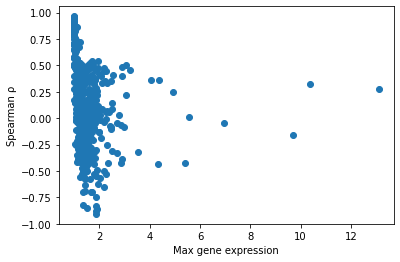

In [57]:
fig, ax = plt.subplots()
ax.scatter(max_expression_list, rho_list)
plt.xlabel('Max gene expression')
plt.ylabel('Spearman ρ')
print(stats.linregress(max_expression_list, rho_list))
print(stats.spearmanr(max_expression_list, rho_list))

LinregressResult(slope=-1.045521725443892, intercept=0.7769568328979641, rvalue=-0.5055961777504767, pvalue=1.2125778560723788e-34, stderr=0.07892489106445454)
SpearmanrResult(correlation=-0.5122175801508523, pvalue=1.1720418659769455e-35)


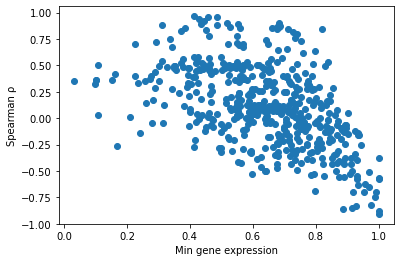

In [58]:
fig, ax = plt.subplots()
ax.scatter(min_expression_list, rho_list)
plt.xlabel('Min gene expression')
plt.ylabel('Spearman ρ')
print(stats.linregress(min_expression_list, rho_list))
print(stats.spearmanr(min_expression_list, rho_list))